In [9]:
import pandas as pd
df1 = pd.read_csv('Database/datasetFlashScore.csv', delimiter=';')
df2 = pd.read_csv('Database/datasetFlashScore2022.csv', delimiter=';')

# Concatena os dois dataframes
df = pd.concat([df1, df2], ignore_index = True)

# Cria um atributo para o resultado do jogo, servindo como target da IA
df['Resultado'] = df.apply(lambda row: "Vitória do time da casa" if int(row['FTHG']) > int(row['FTAG']) else "Vitória do time visitante" if int(row['FTHG']) < int(row['FTAG']) else "Empate", axis=1)

# Cria uma coluna para indicar se o jogo teve 3 gols ou mais
df['Over 2.5'] = df.apply(lambda row: 1 if int(row['FTHG']) + int(row['FTAG']) >= 3 else 0, axis=1)

# df = df.drop(columns=['FTAG', 'FTHG']) | Caso queira o modelo com 95% de acc
df = df.drop(columns=['FTAG', 'FTHG', 'HDG', 'ADG', 'HCG', 'ACG'])
dfTestes = df.head(20)
dfTreinamento = df.iloc[40:]

In [10]:
from pycaret.classification import *
s = setup(dfTreinamento, target = 'Over 2.5', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Over 2.5
2,Target type,Binary
3,Original data shape,"(450, 37)"
4,Transformed data shape,"(450, 150)"
5,Transformed train set shape,"(315, 150)"
6,Transformed test set shape,"(135, 150)"
7,Numeric features,14
8,Categorical features,22
9,Preprocess,True


In [11]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6066,0.6588,0.5519,0.5844,0.5618,0.2060,0.2100,0.5880
svm,SVM - Linear Kernel,0.5845,0.6898,0.5481,0.5116,0.4678,0.1635,0.2013,0.0490
ridge,Ridge Classifier,0.5688,0.6164,0.4771,0.5399,0.5004,0.1251,0.1286,0.0540
lightgbm,Light Gradient Boosting Machine,0.5587,0.5381,0.5590,0.5220,0.5372,0.1176,0.1185,0.1070
nb,Naive Bayes,0.5528,0.5365,0.3805,0.5188,0.4374,0.0822,0.0845,0.0530
et,Extra Trees Classifier,0.5491,0.5516,0.4186,0.5094,0.4544,0.0782,0.0794,0.0710
lda,Linear Discriminant Analysis,0.5460,0.5541,0.4476,0.5071,0.4729,0.0776,0.0788,0.0490
knn,K Neighbors Classifier,0.5429,0.5559,0.4890,0.5087,0.4912,0.0779,0.0796,0.2940
dummy,Dummy Classifier,0.5398,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0500
rf,Random Forest Classifier,0.5305,0.5565,0.4552,0.4951,0.4713,0.0504,0.0516,0.0780


In [12]:
tuned = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5625,0.6510,0.6000,0.5294,0.5625,0.1284,0.1294
1,0.7188,0.7059,0.6667,0.7143,0.6897,0.4331,0.4339
2,0.6875,0.7059,0.6667,0.6667,0.6667,0.3725,0.3725
3,0.5938,0.6745,0.4667,0.5833,0.5185,0.1746,0.1779
4,0.6562,0.7255,0.5333,0.6667,0.5926,0.3016,0.3072
5,0.7419,0.8235,0.5714,0.8000,0.6667,0.4655,0.4831
6,0.6452,0.5924,0.5000,0.6364,0.5600,0.2698,0.2753
7,0.7419,0.8445,0.7143,0.7143,0.7143,0.4790,0.4790
8,0.5484,0.7227,0.4286,0.5000,0.4615,0.0766,0.0773


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [13]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

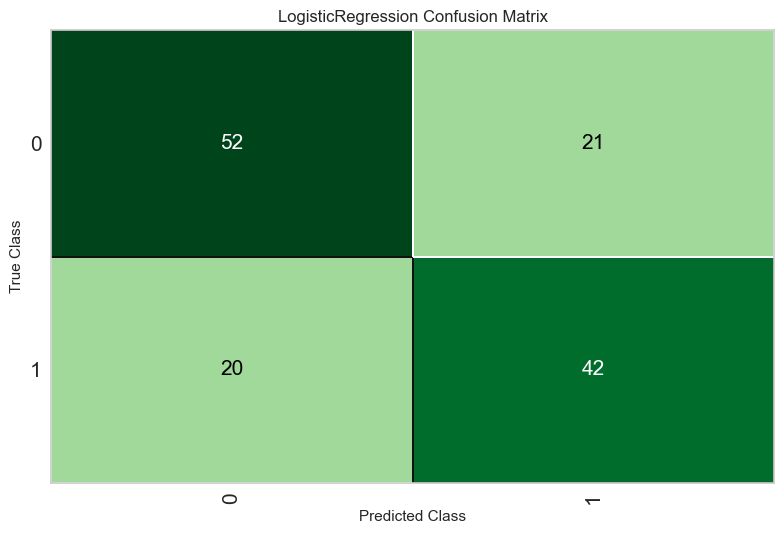

In [14]:
plot_model(best, plot='confusion_matrix')

In [15]:
predictions = predict_model(best, data=dfTestes, raw_score = True)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6000,0.6465,0.8182,0.6000,0.6923,0.1579,0.1741


,HomeTeam,AwayTeam,DateTime,HGE,AGE,HPB,APB,HTG,ATG,HCF,...,APC,HATK,AATK,HATKP,AATKP,Resultado,Over 2.5,prediction_label,prediction_score_0,prediction_score_1
0,Bahia,Atlético-MG,06.12.2023 21:30,1.50,1.00,38%,62%,14,9,7,...,466,81,111,45,26,Vitória do time da casa,1,1,0.3604,0.6396
1,Coritiba,Corinthians,06.12.2023 21:30,0.55,0.58,43%,57%,12,12,5,...,617,93,104,63,45,Vitória do time visitante,0,1,0.4440,0.5560
2,Cruzeiro,Palmeiras,06.12.2023 21:30,1.26,1.47,51%,49%,14,8,7,...,298,116,60,38,26,Empate,0,1,0.3412,0.6588
3,Cuiabá,Athletico-PR,06.12.2023 21:30,2.74,0.85,47%,53%,12,15,5,...,436,76,102,28,62,Vitória do time da casa,1,1,0.3644,0.6356
4,Fluminense,Grêmio,06.12.2023 21:30,2.10,2.10,62%,38%,20,13,11,...,238,146,68,76,27,Vitória do time visitante,1,1,0.3993,0.6007
5,Internacional,Botafogo,06.12.2023 21:30,1.48,0.45,53%,47%,7,9,3,...,417,104,120,21,31,Vitória do time da casa,1,1,0.1347,0.8653
6,Santos,Fortaleza,06.12.2023 21:30,0.97,0.94,57%,43%,14,14,4,...,231,112,81,72,32,Vitória do time visitante,1,0,0.5409,0.4591
7,São Paulo,Flamengo,06.12.2023 21:30,0.52,0.44,47%,53%,9,8,4,...,479,73,112,26,49,Vitória do time da casa,0,0,0.7492,0.2508
8,Vasco,Red Bull Bragantino,06.12.2023 21:30,1.83,0.88,46%,54%,11,10,4,...,333,88,108,44,35,Vitória do time da casa,1,1,0.3679,0.6321
9,Goiás,América-MG,06.12.2023 19:00,0.91,0.91,46%,54%,12,10,5,...,457,66,128,44,62,Vitória do time da casa,0,1,0.4140,0.5860
